In [83]:
#import necesasary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import math
from scipy.special import factorial

In [84]:
#load data files
X_train = np.load("train_features.npy") # X_train.shape = (4459,954)
y_train = np.load("train_labels.npy")   # y_train.shape = (4459,)
N = X_train.shape[0]
d = X_train.shape[1]
print(f"#messages: {N}, vocabulary: {d}")

#messages: 4459, vocabulary: 954


In [85]:
probs = np.zeros((N,d))  #probs.shape = (4459,954) 

In [86]:
spam_indx = [i for i,j in enumerate(y_train) if j == 1] # storing indices of spam messages
notSpam_indx = [i for i,j in enumerate(y_train) if j == 0] # storing indices of non-spam messages

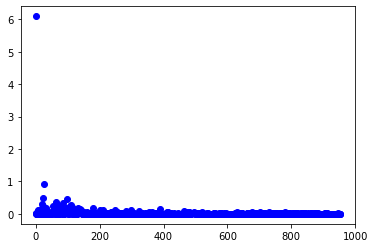

In [87]:
l = []
for i in range(X_train.shape[1]):
    l.append(np.sum(X_train[spam_indx][:,i])/X_train[spam_indx].shape[0])
    
plt.scatter(range(len(l)),l,color='b')

In [88]:
spam_means = X_train[spam_indx].mean(axis=0)  #mean of #word in the spam messages
notSpam_means = X_train[notSpam_indx].mean(axis=0)  #mean of #word in the not spam messages 
print(np.max(X_train[spam_indx]))#,notSpam_means) #>>> (954,) (954,)

17


In [89]:
# calculate the prior probabilities
prior_spam = np.array(spam_indx).shape[0]/N
prior_notSpam = np.array(notSpam_indx).shape[0]/N

In [90]:
temp = np.power(spam_means.reshape((1,-1)),X_train[spam_indx])  # (592,954)

In [91]:
fact = factorial(X_train[spam_indx]) ** -1  # (592,954)

In [92]:
temp2 = np.exp(-1*spam_means).reshape((1,-1)) # (1,954)

In [93]:
t = np.multiply(temp,fact)
#print(t.shape)
X_probs_spam = np.multiply(temp2,t)

In [94]:
np.argmax(X_probs_spam,axis = 1)
#X_probs_spam[3,:]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [95]:
# non-spam messages
temp = np.power(notSpam_means.reshape((1,-1)),X_train[notSpam_indx])  # (3867,954)
fact = factorial(X_train[notSpam_indx]) ** -1  # (3867,954)
temp2 = np.exp(-1*notSpam_means).reshape((1,-1)) # (1,954)
t = np.multiply(temp,fact)
#temp2.shape
X_probs_notSpam = np.multiply(temp2,t)

In [96]:
mean_prob_words_spam =  X_probs_spam.mean(axis = 0)  # (954,)
mean_prob_words_notSpam = X_probs_notSpam.mean(axis = 0) # (954,)

In [97]:
# load test data 

X_test = np.load("test_features.npy") # (1115,954)
y_test = np.load("test_labels.npy")   # (1115,)
#print(X_test.shape ,y_test.shape)

In [98]:
# test data considering non-spam distribution
temp = np.power(notSpam_means.reshape((1,-1)),X_test[:])  # (1115,954)
fact = factorial(X_test[:]) ** -1  # (1115,954)
temp2 = np.exp(-1*notSpam_means).reshape((1,-1)) # (1,954)
t = np.multiply(temp,fact)
#temp2.shape
X_test_probs_notSpam = np.multiply(temp2,t)
X_test_probs_notSpam.shape

(1115, 954)

In [99]:
# test data considering spam distribution
temp = np.power(spam_means.reshape((1,-1)),X_test[:])  # (1115,954)
fact = factorial(X_test[:]) ** -1  # (1115,954)
temp2 = np.exp(-1*spam_means).reshape((1,-1)) # (1,954)
t = np.multiply(temp,fact)
#temp2.shape
X_test_probs_spam = np.multiply(temp2,t)
X_test_probs_spam.shape

(1115, 954)

In [100]:
ans = 0
pred_spam = []
pred_notSpam = []

# check if : prior_spam * P(X | spam) > prior_notSpam * P(X | notSpam)

# prior_spam * P(X | spam)
for row in X_test_probs_spam:
    cont = prior_spam
    for i in row:
        cont *= i
    pred_spam.append(cont)
    

In [101]:
# prior_notSpam * P(X | not-spam)
for row in X_test_probs_notSpam:
    cont = prior_notSpam
    for i in row:
        cont *= i
    pred_notSpam.append(cont)
    


In [102]:
y_pred = []
for i in range(len(pred_spam)):
    y_pred.append(int(pred_spam[i] > pred_notSpam[i]))
    

In [103]:
y_main = list(y_test)
count = 0
for i in range(len(y_pred)):
    count += int(y_pred[i] != y_main[i])
    
print(count)
    

28


In [104]:
print(f"Precision = {(1 - count/X_test.shape[0])*100}%")

Precision = 97.48878923766816%


In [105]:
# load test data 

X_test = np.load("test_features.npy") # (1115,954)
y_test = np.load("test_labels.npy")   # (1115,)
#print(X_test.shape ,y_test.shape)

In [106]:
# spam_means
# notSpam_means



In [127]:
fact = -1* np.log(factorial(X_test))
temp = fact + np.multiply(np.log(1e-12 + spam_means),X_test) - spam_means
spam_temp = np.sum(temp,axis = 1)
one = np.exp(spam_temp)

In [128]:
fact = - np.log(1e-12 + factorial(X_test[:]))
temp = fact + np.multiply(np.log(1e-12 + notSpam_means),X_test) - notSpam_means
notSpam_temp = np.sum(temp,axis = 1)
two = np.exp(notSpam_temp)

In [129]:
np.sum((one >= two) == y_test)

1096

In [130]:
len(X_test)

1115

In [132]:
1096/1115

0.9829596412556054